<a href="https://colab.research.google.com/github/Tariq15994/Deep-learning/blob/master/Additional_Work_on_IDBMS_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Additional work on imbd dataset**

In [0]:
import tensorflow

In [0]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
print(train_data[0])

train_labels[0]


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


1

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

The following experiments will help convince you that the architecture choices you’ve
made are all fairly reasonable, although there’s still room for improvement:
 You used two hidden layers. Try using one or three hidden layers, and see how
doing so affects validation and test accuracy.
 Try using layers with more hidden units or fewer hidden units: 32 units, 64 units,
and so on.
 Try using the mse loss function instead of binary_crossentropy.
 Try using the tanh activation (an activation that was popular in the early days of
neural networks) instead of relu.

In [0]:

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 122us/sample - loss: 0.5213 - acc: 0.7813 - val_loss: 0.3497 - val_acc: 0.8677
Epoch 2/10
15000/15000 [==============================] - 1s 97us/sample - loss: 0.2475 - acc: 0.9119 - val_loss: 0.2766 - val_acc: 0.8883
Epoch 3/10
15000/15000 [==============================] - 1s 100us/sample - loss: 0.1570 - acc: 0.9455 - val_loss: 0.2868 - val_acc: 0.8843
Epoch 4/10
15000/15000 [==============================] - 1s 97us/sample - loss: 0.1070 - acc: 0.9674 - val_loss: 0.3172 - val_acc: 0.8828
Epoch 5/10
15000/15000 [==============================] - 1s 98us/sample - loss: 0.0764 - acc: 0.9801 - val_loss: 0.3517 - val_acc: 0.8775
Epoch 6/10
15000/15000 [==============================] - 1s 95us/sample - loss: 0.0500 - acc: 0.9901 - val_loss: 0.3941 - val_acc: 0.8751
Epoch 7/10
15000/15000 [==============================] - 1s 95us/sample - loss: 0.0316 - acc: 0.9953 - val_loss: 

In [0]:
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

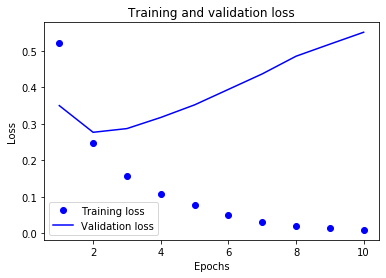

In [0]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

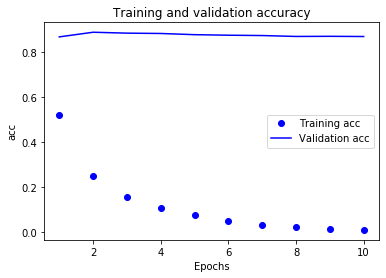

In [0]:
 #Plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['loss']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

***Try using one or three hidden layers, and see how doing so affects validation and test accuracy.  Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on***

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512,validation_data=(x_val, y_val))


Train on 25000 samples, validate on 10000 samples
Epoch 1/2
25000/25000 [==============================] - 2s 95us/sample - loss: 0.4590 - acc: 0.8114 - val_loss: 0.2659 - val_acc: 0.9127
Epoch 2/2
25000/25000 [==============================] - 2s 79us/sample - loss: 0.2354 - acc: 0.9166 - val_loss: 0.1758 - val_acc: 0.9434


In [0]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 71us/sample - loss: 0.2826 - acc: 0.8866


In [0]:
model=models.Sequential()
model.add(layers.Dense(512,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,partial_y_train,epochs=12,batch_size=128)

Train on 15000 samples
Epoch 1/12
15000/15000 [==============================] - 10s 698us/sample - loss: 0.6932 - acc: 0.5007
Epoch 2/12
15000/15000 [==============================] - 10s 679us/sample - loss: 0.6931 - acc: 0.5035
Epoch 3/12
15000/15000 [==============================] - 10s 683us/sample - loss: 0.6931 - acc: 0.5030
Epoch 4/12
15000/15000 [==============================] - 10s 687us/sample - loss: 0.6931 - acc: 0.5035
Epoch 5/12
15000/15000 [==============================] - 10s 686us/sample - loss: 0.6931 - acc: 0.5035
Epoch 6/12
15000/15000 [==============================] - 10s 681us/sample - loss: 0.6931 - acc: 0.5035
Epoch 7/12
15000/15000 [==============================] - 10s 680us/sample - loss: 0.6931 - acc: 0.5035
Epoch 8/12
15000/15000 [==============================] - 10s 676us/sample - loss: 0.6931 - acc: 0.5035
Epoch 9/12
15000/15000 [==============================] - 10s 677us/sample - loss: 0.6931 - acc: 0.5035
Epoch 10/12
15000/15000 [================

In [0]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 79us/sample - loss: 1.5099 - acc: 0.8519


In [0]:
model=models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,partial_y_train,epochs=1,batch_size=128,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
15000/15000 [==============================] - 3s 190us/sample - loss: 0.3663 - acc: 0.8449 - val_loss: 0.2917 - val_acc: 0.8831


In [0]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 88us/sample - loss: 0.3115 - acc: 0.8746


Try using the mse loss function instead of binary_crossentropy.  Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

In [0]:
model=models.Sequential()
model.add(layers.Dense(64,activation="tanh",input_shape=(10000,)))
model.add(layers.Dense(64,activation="tanh"))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(partial_x_train,partial_y_train,epochs=1,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
15000/15000 [==============================] - 3s 169us/sample - loss: 0.1524 - acc: 0.7823 - val_loss: 0.0900 - val_acc: 0.8820


In [0]:
result=model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 94us/sample - loss: 0.0964 - acc: 0.8737


just change loss function

In [0]:
modell=models.Sequential()
modell.add(layers.Dense(64,activation="relu",input_shape=(10000,)))
modell.add(layers.Dense(64,activation="relu"))
modell.add(layers.Dense(1,activation="sigmoid"))
modell.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
modell.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 176us/sample - loss: 0.1574 - acc: 0.7694 - val_loss: 0.1185 - val_acc: 0.8384
Epoch 2/4
15000/15000 [==============================] - 2s 120us/sample - loss: 0.0769 - acc: 0.9042 - val_loss: 0.0937 - val_acc: 0.8727
Epoch 3/4
15000/15000 [==============================] - 2s 118us/sample - loss: 0.0512 - acc: 0.9361 - val_loss: 0.0849 - val_acc: 0.8845
Epoch 4/4
15000/15000 [==============================] - 2s 120us/sample - loss: 0.0394 - acc: 0.9515 - val_loss: 0.0854 - val_acc: 0.8856


In [0]:
result=modell.evaluate(x_test,y_test)


25000/25000 [==============================] - 2s 91us/sample - loss: 0.0923 - acc: 0.8742


just change activation function

In [0]:
modell=models.Sequential()
modell.add(layers.Dense(64,activation="tanh",input_shape=(10000,)))
modell.add(layers.Dense(64,activation="tanh"))
modell.add(layers.Dense(1,activation="sigmoid"))
modell.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
modell.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 193us/sample - loss: 0.4707 - acc: 0.7865 - val_loss: 0.3152 - val_acc: 0.8735
Epoch 2/4
15000/15000 [==============================] - 2s 123us/sample - loss: 0.2345 - acc: 0.9111 - val_loss: 0.3139 - val_acc: 0.8719
Epoch 3/4
15000/15000 [==============================] - 2s 125us/sample - loss: 0.1675 - acc: 0.9364 - val_loss: 0.3109 - val_acc: 0.8782
Epoch 4/4
15000/15000 [==============================] - 2s 130us/sample - loss: 0.1412 - acc: 0.9443 - val_loss: 0.3211 - val_acc: 0.8825


In [0]:
result=modell.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 98us/sample - loss: 0.3504 - acc: 0.8708
